In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matr=pd.read_csv("~/Downloads/fantom//expression.tpm.gene.ASO.tsv", sep='\t', header=None)

/tmp/ipykernel_12881/3309410538.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

In [3]:
def get_high(column1, column2):
    rna_id=pd.DataFrame(((matr[column1][85707:124058]+matr[column2][85707:124058])/2)+1).astype(float)
    rna_id=np.log10(rna_id)
    expr=rna_id.sort_values(by=0)[0]
    ensg=[]
    for elem in (rna_id.sort_values(by=0).index):
        ensg.append(matr[0][elem])
    df=pd.DataFrame({"ensg":ensg, "expr":expr})
    max_expr=df.iloc[-1, 1]
    high=df[df["expr"]>= 0.2*max_expr]["ensg"].to_numpy()
    return high

def get_low(column1, column2):
    rna_id=pd.DataFrame(((matr[column1][85707:124058]+matr[column2][85707:124058])/2)+1).astype(float)
    rna_id=np.log10(rna_id)
    expr=rna_id.sort_values(by=0)[0]
    ensg=[]
    for elem in (rna_id.sort_values(by=0).index):
        ensg.append(matr[0][elem])
    df=pd.DataFrame({"ensg":ensg, "expr":expr})
    max_expr=df.iloc[-1, 1]
    low=df[(df["expr"]<= 0.2*max_expr) & (df["expr"] != 0)]["ensg"].to_numpy()
    return low

def get_zero(column1, column2):
    rna_id=pd.DataFrame(((matr[column1][85707:124058]+matr[column2][85707:124058])/2)+1).astype(float)
    rna_id=np.log10(rna_id)
    expr=rna_id.sort_values(by=0)[0]
    ensg=[]
    for elem in (rna_id.sort_values(by=0).index):
        ensg.append(matr[0][elem])
    df=pd.DataFrame({"ensg":ensg, "expr":expr})
    max_expr=df.iloc[-1, 1]
    zero=df[df["expr"]== 0]["ensg"].to_numpy()
    return zero

def get_high_common(column1, column2, column3, column4):
    rna_id=pd.DataFrame(((matr[column1][85707:124058]
                      +matr[column2][85707:124058]
                      +matr[column3][85707:124058]
                      +matr[column4][85707:124058])/4)+1).astype(float)
    
    rna_id=np.log10(rna_id)
    expr=rna_id.sort_values(by=0)[0]
    ensg=[]
    for elem in (rna_id.sort_values(by=0).index):
        ensg.append(matr[0][elem])
    df=pd.DataFrame({"ensg":ensg, "expr":expr})
    max_expr=df.iloc[-1, 1]
    high=df[df["expr"]>= 0.2*max_expr]["ensg"].to_numpy()
    return high

def get_low_common(column1, column2, column3, column4):
    rna_id=pd.DataFrame(((matr[column1][85707:124058]
                      +matr[column2][85707:124058]
                      +matr[column3][85707:124058]
                      +matr[column4][85707:124058])/4)+1).astype(float)
    rna_id=np.log10(rna_id)
    expr=rna_id.sort_values(by=0)[0]
    ensg=[]
    for elem in (rna_id.sort_values(by=0).index):
        ensg.append(matr[0][elem])
    df=pd.DataFrame({"ensg":ensg, "expr":expr})
    max_expr=df.iloc[-1, 1]
    low=df[(df["expr"]<= 0.2*max_expr) & (df["expr"] != 0)]["ensg"].to_numpy()
    return low

def get_zero_common(column1, column2, column3, column4):
    rna_id=pd.DataFrame(((matr[column1][85707:124058]
                      +matr[column2][85707:124058]
                      +matr[column3][85707:124058]
                      +matr[column4][85707:124058])/4)+1).astype(float)
    rna_id=np.log10(rna_id)
    expr=rna_id.sort_values(by=0)[0]
    ensg=[]
    for elem in (rna_id.sort_values(by=0).index):
        ensg.append(matr[0][elem])
    df=pd.DataFrame({"ensg":ensg, "expr":expr})
    max_expr=df.iloc[-1, 1]
    zero=df[df["expr"]== 0]["ensg"].to_numpy()
    return zero

In [4]:
#FGD5-AS1: 
#25  - 04
#92  - 04
#723 - ad03
#725 - ad03

fgd5_04_high = get_high(25, 92)
fgd5_04_low = get_low(25, 92)
fgd5_04_zero = get_zero(25, 92)
fgd5_ad03_high = get_high(723, 725)
fgd5_ad03_low = get_low(723, 725)
fgd5_ad03_zero = get_zero(723, 725)
fgd5_high = get_high_common(25, 92, 723, 725)
fgd5_low = get_low_common(25, 92, 723, 725)
fgd5_zero = get_zero_common(25, 92, 723, 725)

with open("fgd5_04_high.txt", 'w') as f:
  for i in range(len(fgd5_04_high)):
    f.write(fgd5_04_high[i]+ '\n')
with open("fgd5_04_low.txt", 'w') as f:
  for i in range(len(fgd5_04_low)):
    f.write(fgd5_04_low[i]+ '\n')
with open("fgd5_04_zero.txt", 'w') as f:
  for i in range(len(fgd5_04_zero)):
    f.write(fgd5_04_zero[i]+ '\n') 
    
    
with open("fgd5_ad03_high.txt", 'w') as f:
  for i in range(len(fgd5_ad03_high)):
    f.write(fgd5_ad03_high[i]+ '\n')
with open("fgd5_ad03_low.txt", 'w') as f:
  for i in range(len(fgd5_ad03_low)):
    f.write(fgd5_ad03_low[i]+ '\n')
with open("fgd5_ad03_zero.txt", 'w') as f:
  for i in range(len(fgd5_ad03_zero)):
    f.write(fgd5_ad03_zero[i]+ '\n') 
    
    
with open("fgd5_high.txt", 'w') as f:
  for i in range(len(fgd5_high)):
    f.write(fgd5_high[i]+ '\n')
with open("fgd5_low.txt", 'w') as f:
  for i in range(len(fgd5_low)):
    f.write(fgd5_low[i]+ '\n')
with open("fgd5_zero.txt", 'w') as f:
  for i in range(len(fgd5_zero)):
    f.write(fgd5_zero[i]+ '\n') 

In [5]:
# EMX2OS: 
#708 - ad02
#709 - ad02
#693 - ad04
#737 - ad04

emx2os_ad02_high = get_high(708, 709)
emx2os_ad02_low = get_low(708, 709)
emx2os_ad02_zero = get_zero(708, 709)
emx2os_ad04_high = get_high(693, 737)
emx2os_ad04_low = get_low(693, 737)
emx2os_ad04_zero = get_zero(693, 737)
emx2os_high = get_high_common(708, 709, 693, 737)
emx2os_low = get_low_common(708, 709, 693, 737)
emx2os_zero = get_zero_common(708, 709, 693, 737)

with open("emx2os_ad02_high.txt", 'w') as f:
  for i in range(len(emx2os_ad02_high)):
    f.write(emx2os_ad02_high[i]+ '\n')
with open("emx2os_ad02_low.txt", 'w') as f:
  for i in range(len(emx2os_ad02_low)):
    f.write(emx2os_ad02_low[i]+ '\n')
with open("emx2os_ad02_zero.txt", 'w') as f:
  for i in range(len(emx2os_ad02_zero)):
    f.write(emx2os_ad02_zero[i]+ '\n') 
    
    
with open("emx2os_ad04_high.txt", 'w') as f:
  for i in range(len(emx2os_ad04_high)):
    f.write(emx2os_ad04_high[i]+ '\n')
with open("emx2os_ad04_low.txt", 'w') as f:
  for i in range(len(emx2os_ad04_low)):
    f.write(emx2os_ad04_low[i]+ '\n')
with open("emx2os_ad04_zero.txt", 'w') as f:
  for i in range(len(emx2os_ad04_zero)):
    f.write(emx2os_ad04_zero[i]+ '\n') 
    
    
with open("emx2os_high.txt", 'w') as f:
  for i in range(len(emx2os_high)):
    f.write(emx2os_high[i]+ '\n')
with open("emx2os_low.txt", 'w') as f:
  for i in range(len(emx2os_low)):
    f.write(emx2os_low[i]+ '\n')
with open("emx2os_zero.txt", 'w') as f:
  for i in range(len(emx2os_zero)):
    f.write(emx2os_zero[i]+ '\n') 

In [6]:
#AC: 
#108 - 02
#110 - 02
#95  - 03
#158 - 03

ac_02_high = get_high(108, 110)
ac_02_low = get_low(108, 110)
ac_02_zero = get_zero(108, 110)
ac_03_high = get_high(95, 158)
ac_03_low = get_low(95, 158)
ac_03_zero = get_zero(95, 158)
ac_high = get_high_common(108, 110, 95, 158)
ac_low = get_low_common(108, 110, 95, 158)
ac_zero = get_zero_common(108, 110, 95, 158)

with open("ac_02_high.txt", 'w') as f:
  for i in range(len(ac_02_high)):
    f.write(ac_02_high[i]+ '\n')
with open("ac_02_low.txt", 'w') as f:
  for i in range(len(ac_02_low)):
    f.write(ac_02_low[i]+ '\n')
with open("ac_02_zero.txt", 'w') as f:
  for i in range(len(ac_02_zero)):
    f.write(ac_02_zero[i]+ '\n') 
    
    
with open("ac_03_high.txt", 'w') as f:
  for i in range(len(ac_03_high)):
    f.write(ac_03_high[i]+ '\n')
with open("ac_03_low.txt", 'w') as f:
  for i in range(len(ac_03_low)):
    f.write(ac_03_low[i]+ '\n')
with open("ac_03_zero.txt", 'w') as f:
  for i in range(len(ac_03_zero)):
    f.write(ac_03_zero[i]+ '\n') 
    
    
with open("ac_high.txt", 'w') as f:
  for i in range(len(ac_high)):
    f.write(ac_high[i]+ '\n')
with open("ac_low.txt", 'w') as f:
  for i in range(len(ac_low)):
    f.write(ac_low[i]+ '\n')
with open("ac_zero.txt", 'w') as f:
  for i in range(len(ac_zero)):
    f.write(ac_zero[i]+ '\n') 

In [7]:
#RP11: 
#169 - 03
#167 - 03
#105 - 05
#147 - 05

rp11_03_high = get_high(169, 167)
rp11_03_low = get_low(169, 167)
rp11_03_zero = get_zero(169, 167)
rp11_05_high = get_high(105, 147)
rp11_05_low = get_low(105, 147)
rp11_05_zero = get_zero(105, 147)
rp11_high = get_high_common(169, 167, 105, 147)
rp11_low = get_low_common(169, 167, 105, 147)
rp11_zero = get_zero_common(169, 167, 105, 147)

with open("rp11_03_high.txt", 'w') as f:
  for i in range(len(rp11_03_high)):
    f.write(rp11_03_high[i]+ '\n')
with open("rp11_03_low.txt", 'w') as f:
  for i in range(len(rp11_03_low)):
    f.write(rp11_03_low[i]+ '\n')
with open("rp11_03_zero.txt", 'w') as f:
  for i in range(len(rp11_03_zero)):
    f.write(rp11_03_zero[i]+ '\n') 
    
    
with open("rp11_05_high.txt", 'w') as f:
  for i in range(len(rp11_05_high)):
    f.write(rp11_05_high[i]+ '\n')
with open("rp11_05_low.txt", 'w') as f:
  for i in range(len(rp11_05_low)):
    f.write(rp11_05_low[i]+ '\n')
with open("rp11_05_zero.txt", 'w') as f:
  for i in range(len(rp11_05_zero)):
    f.write(rp11_05_zero[i]+ '\n') 
    
    
with open("rp11_high.txt", 'w') as f:
  for i in range(len(rp11_high)):
    f.write(rp11_high[i]+ '\n')
with open("rp11_low.txt", 'w') as f:
  for i in range(len(rp11_low)):
    f.write(rp11_low[i]+ '\n')
with open("rp11_zero.txt", 'w') as f:
  for i in range(len(rp11_zero)):
    f.write(rp11_zero[i]+ '\n') 

In [8]:
#CTD:
#226 - 01
#240 - 01
#259 - 03
#195 - 03

ctd_01_high = get_high(226, 240)
ctd_01_low = get_low(226, 240)
ctd_01_zero = get_zero(226, 240)
ctd_03_high = get_high(195, 259)
ctd_03_low = get_low(195, 259)
ctd_03_zero = get_zero(195, 259)
ctd_high = get_high_common(226, 240, 195, 259)
ctd_low = get_low_common(226, 240, 195, 259)
ctd_zero = get_zero_common(226, 240, 195, 259)

with open("ctd_01_high.txt", 'w') as f:
  for i in range(len(ctd_01_high)):
    f.write(ctd_01_high[i]+ '\n')
with open("ctd_01_low.txt", 'w') as f:
  for i in range(len(ctd_01_low)):
    f.write(ctd_01_low[i]+ '\n')
with open("ctd_01_zero.txt", 'w') as f:
  for i in range(len(ctd_01_zero)):
    f.write(ctd_01_zero[i]+ '\n') 
    
    
with open("ctd_03_high.txt", 'w') as f:
  for i in range(len(ctd_03_high)):
    f.write(ctd_03_high[i]+ '\n')
with open("ctd_03_low.txt", 'w') as f:
  for i in range(len(ctd_03_low)):
    f.write(ctd_03_low[i]+ '\n')
with open("ctd_03_zero.txt", 'w') as f:
  for i in range(len(ctd_03_zero)):
    f.write(ctd_03_zero[i]+ '\n') 
    
    
with open("ctd_high.txt", 'w') as f:
  for i in range(len(ctd_high)):
    f.write(ctd_high[i]+ '\n')
with open("ctd_low.txt", 'w') as f:
  for i in range(len(ctd_low)):
    f.write(ctd_low[i]+ '\n')
with open("ctd_zero.txt", 'w') as f:
  for i in range(len(ctd_zero)):
    f.write(ctd_zero[i]+ '\n') 

In [9]:
#JPX: 
#292  - 05
#295  - 05
#1007 - ad04
#1045 - ad04

jpx_05_high = get_high(292, 295)
jpx_05_low = get_low(292, 295)
jpx_05_zero = get_zero(292, 295)
jpx_ad04_high = get_high(1007, 1045)
jpx_ad04_low = get_low(1007, 1045)
jpx_ad04_zero = get_zero(1007, 1045)
jpx_high = get_high_common(292, 295, 1007, 1045)
jpx_low = get_low_common(292, 295, 1007, 1045)
jpx_zero = get_zero_common(292, 295, 1007, 1045)

with open("jpx_05_high.txt", 'w') as f:
  for i in range(len(jpx_05_high)):
    f.write(jpx_05_high[i]+ '\n')
with open("jpx_05_low.txt", 'w') as f:
  for i in range(len(jpx_05_low)):
    f.write(jpx_05_low[i]+ '\n')
with open("jpx_05_zero.txt", 'w') as f:
  for i in range(len(jpx_05_zero)):
    f.write(jpx_05_zero[i]+ '\n') 
    
    
with open("jpx_ad04_high.txt", 'w') as f:
  for i in range(len(jpx_ad04_high)):
    f.write(jpx_ad04_high[i]+ '\n')
with open("jpx_ad04_low.txt", 'w') as f:
  for i in range(len(jpx_ad04_low)):
    f.write(jpx_ad04_low[i]+ '\n')
with open("jpx_ad04_zero.txt", 'w') as f:
  for i in range(len(jpx_ad04_zero)):
    f.write(jpx_ad04_zero[i]+ '\n') 
    
    
with open("jpx_high.txt", 'w') as f:
  for i in range(len(jpx_high)):
    f.write(jpx_high[i]+ '\n')
with open("jpx_low.txt", 'w') as f:
  for i in range(len(jpx_low)):
    f.write(jpx_low[i]+ '\n')
with open("jpx_zero.txt", 'w') as f:
  for i in range(len(jpx_zero)):
    f.write(jpx_zero[i]+ '\n') 

In [10]:
#MAPKAPK-AS1: 
#434 - 06
#454 - 06
#748 - ad04
#753 - ad04

mapkapk_06_high = get_high(434, 454)
mapkapk_06_low = get_low(434, 454)
mapkapk_06_zero = get_zero(434, 454)
mapkapk_ad04_high = get_high(748, 753)
mapkapk_ad04_low = get_low(748, 753)
mapkapk_ad04_zero = get_zero(748, 753)
mapkapk_high = get_high_common(434, 454, 748, 753)
mapkapk_low = get_low_common(434, 454, 748, 753)
mapkapk_zero = get_zero_common(434, 454, 748, 753)

with open("mapkapk_06_high.txt", 'w') as f:
  for i in range(len(mapkapk_06_high)):
    f.write(mapkapk_06_high[i]+ '\n')
with open("mapkapk_06_low.txt", 'w') as f:
  for i in range(len(mapkapk_06_low)):
    f.write(mapkapk_06_low[i]+ '\n')
with open("mapkapk_06_zero.txt", 'w') as f:
  for i in range(len(mapkapk_06_zero)):
    f.write(mapkapk_06_zero[i]+ '\n') 
    
    
with open("mapkapk_ad04_high.txt", 'w') as f:
  for i in range(len(mapkapk_ad04_high)):
    f.write(mapkapk_ad04_high[i]+ '\n')
with open("mapkapk_ad04_low.txt", 'w') as f:
  for i in range(len(mapkapk_ad04_low)):
    f.write(mapkapk_ad04_low[i]+ '\n')
with open("mapkapk_ad04_zero.txt", 'w') as f:
  for i in range(len(mapkapk_ad04_zero)):
    f.write(mapkapk_ad04_zero[i]+ '\n') 
    
    
with open("mapkapk_high.txt", 'w') as f:
  for i in range(len(mapkapk_high)):
    f.write(mapkapk_high[i]+ '\n')
with open("mapkapk_low.txt", 'w') as f:
  for i in range(len(mapkapk_low)):
    f.write(mapkapk_low[i]+ '\n')
with open("mapkapk_zero.txt", 'w') as f:
  for i in range(len(mapkapk_zero)):
    f.write(mapkapk_zero[i]+ '\n') 

In [2]:
nc=pd.read_csv("~/Downloads/fantom/expression.tpm.gene.None.tsv", sep='\t', header=None)

In [4]:
nc_id = np.array(nc.loc[85707:124050, 1:])
nc_id=pd.DataFrame(nc_id.astype(float).mean(axis=1))
nc_id=np.log10(nc_id+1)
expr=nc_id.sort_values(by=0)[0]
ensg=[]
for elem in (nc_id.sort_values(by=0).index+85707):
  ensg.append(nc[0][elem])
df=pd.DataFrame({"ensg":ensg, "expr":expr})
max_expr=df.iloc[-1, 1]
nc_high=df[df["expr"]>= 0.2*max_expr]["ensg"].to_numpy()
nc_low=df[(df["expr"]<= 0.2*max_expr) & (df["expr"] != 0)]["ensg"].to_numpy()
nc_zero=df[df["expr"]== 0]["ensg"].to_numpy()

with open("nc_high.txt", 'w') as f:
  for i in range(len(nc_high)):
    f.write(nc_high[i]+ '\n')
with open("nc_low.txt", 'w') as f:
  for i in range(len(nc_low)):
    f.write(nc_low[i]+ '\n')
with open("nc_zero.txt", 'w') as f:
  for i in range(len(nc_zero)):
    f.write(nc_zero[i]+ '\n') 

# Violin plots with expression

In [13]:
nc_1 = (nc[1][11:124057]).astype(float)+1
nc_2 = (nc[2][11:124057]).astype(float)+1
nc_3 = (nc[3][11:124057]).astype(float)+1
nc_4 = (nc[4][11:124057]).astype(float)+1
vp1_1 = (matr[226][85707:124058]).astype(float)+1
vp1_2 = (matr[240][85707:124058]).astype(float)+1
vp2_1 = (matr[195][85707:124058]).astype(float)+1
vp2_2 = (matr[259][85707:124058]).astype(float)+1
vp0 = {'ASO_01_rep1': vp1_1, 'ASO_01_rep2': vp1_2, 'ASO_03_rep1': vp2_1,'ASO_03_rep2': vp2_2 }
nc0 = {'WT_rep1': nc_1, 'WT_rep2': nc_2, 'WT_rep3': nc_3,'WT_rep4': nc_4 }
nc_0 = pd.DataFrame(data = nc0)
nc_0 = np.log10(nc_0)
nc_vp= {'ASO_01_rep1': vp1_1, 'ASO_01_rep2': vp1_2, 'ASO_03_rep1': vp2_1,'ASO_03_rep2': vp2_2, 'WT_rep1': nc_1, 'WT_rep2': nc_2, 'WT_rep3': nc_3,'WT_rep4': nc_4 }
nc_vp = pd.DataFrame(data = nc_vp)
nc_vp = np.log10(nc_vp)

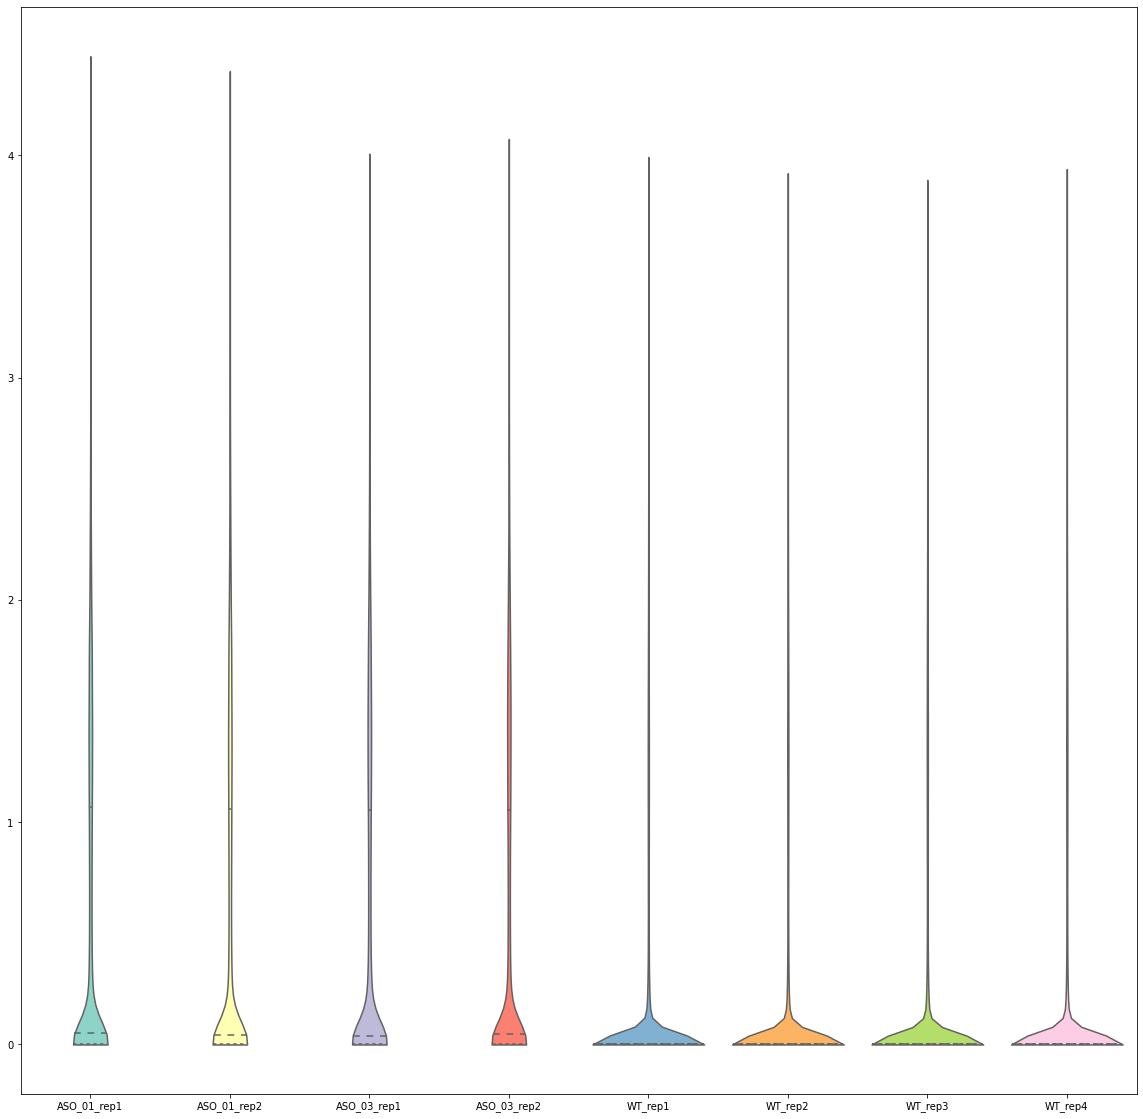

In [16]:
sns.color_palette(palette = 'Set3', n_colors = 10, as_cmap = True)
mpl.rcParams['figure.figsize'] = 20,20
mpl.rcParams["patch.force_edgecolor"] = True
ax = sns.violinplot(data=nc_vp, scale = 'count', inner = 'quartile', palette = 'Set3', saturation = 1, cut = 0)
fig = ax.get_figure()
#fig.patch.set_alpha(0)
fig.savefig("violin_plt.png", bbox_inches='tight', pad_inches =0)
fig.savefig("violin_plt.svg", bbox_inches='tight', pad_inches =0, format="svg")